In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix

from pandas_ml import ConfusionMatrix

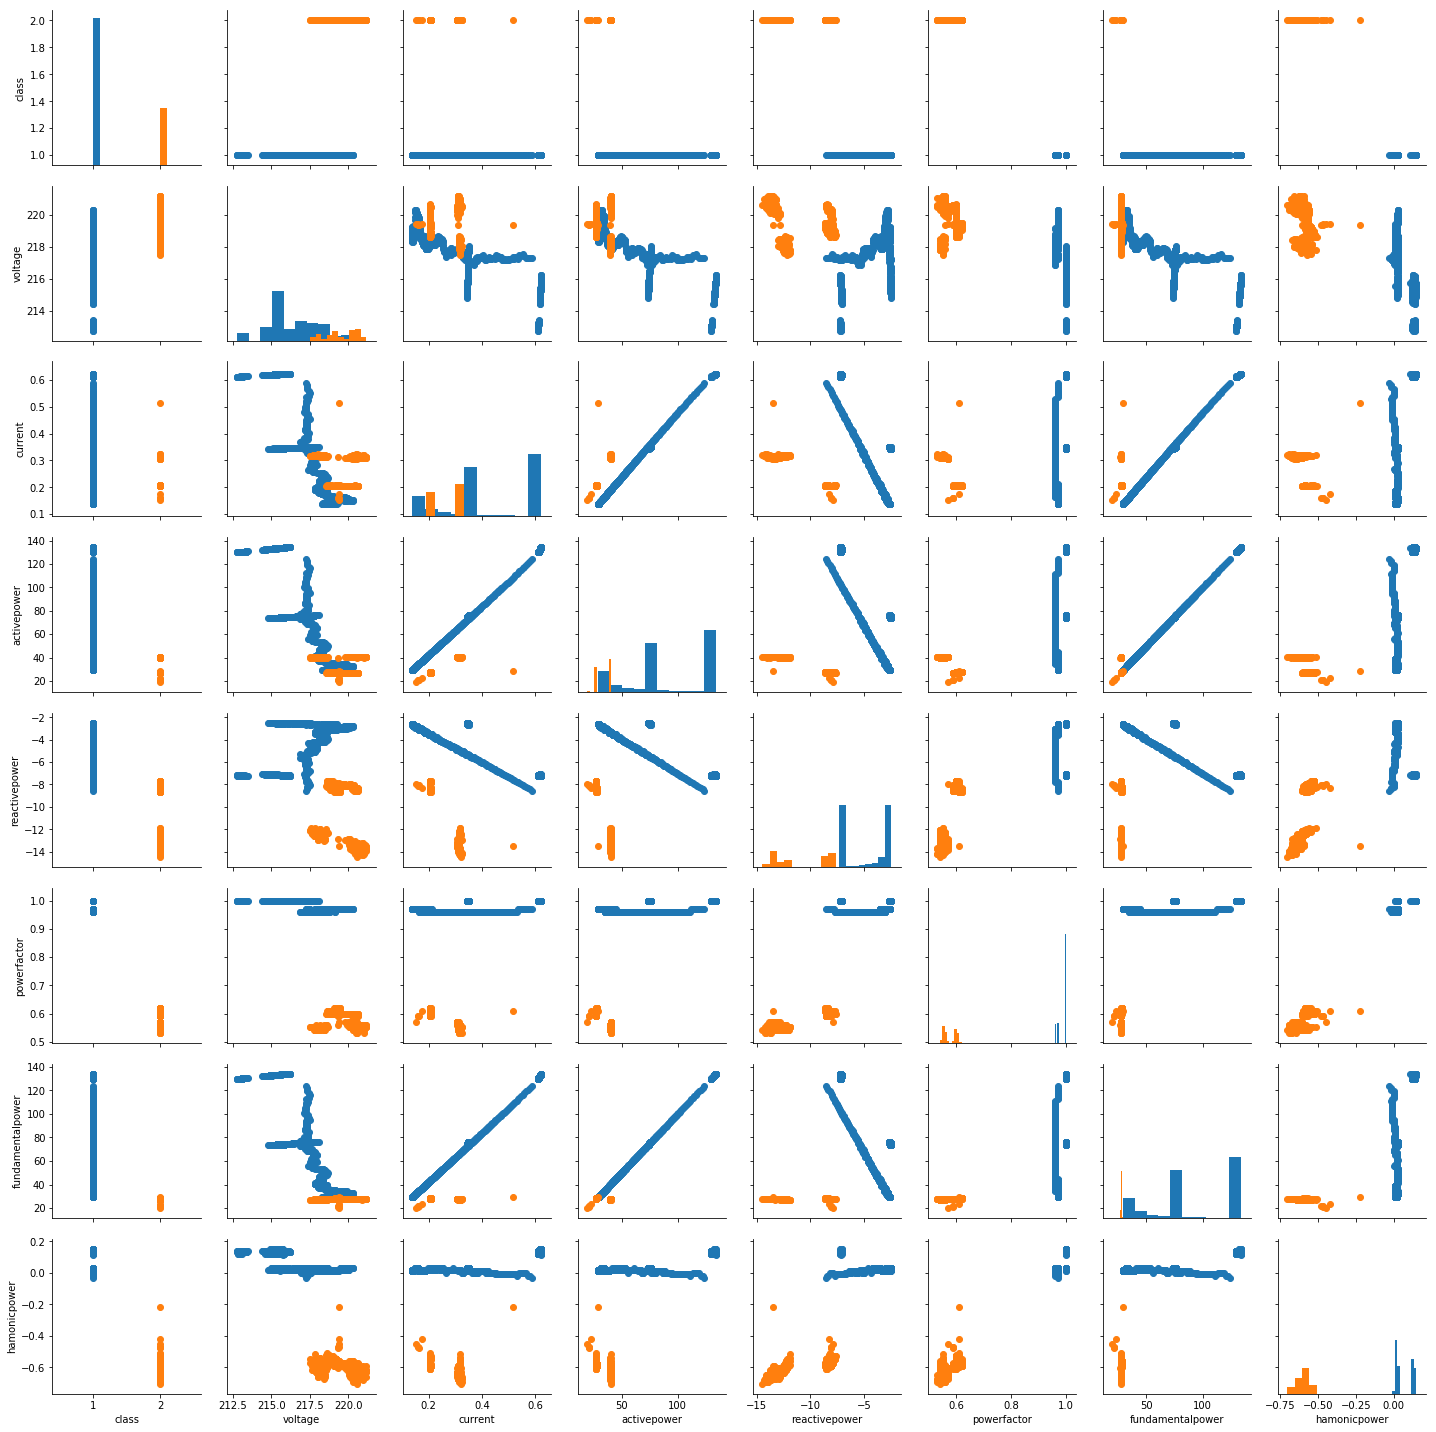

In [20]:
# Import data (exported from Postgree)
data = pd.read_csv ("equipmentsData.csv", header=0);

g = sns.PairGrid(data, hue='class')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## Set the timestamp as index
data['time'] = pd.to_datetime (data['time'])
data = data.set_index(data.time)

In [3]:
## Resample
resampled = data.resample('min').agg({'class':['mean', 'count'],
                                      'voltage': 'mean',
                                      'current':['mean','var'],
                                      'activepower': 'mean',
                                      'reactivepower': 'mean',
                                      'powerfactor': 'mean',
                                      'fundamentalpower': 'mean',
                                      'hamonicpower':['mean','var']
                                     })
resampled.columns = resampled.columns.map('_'.join)
resampled = resampled.query('class_count > 50')
resampled = resampled.drop('class_count', axis=1)
resampled.head()

,class_mean,voltage_mean,current_mean,current_var,activepower_mean,reactivepower_mean,powerfactor_mean,fundamentalpower_mean,hamonicpower_mean,hamonicpower_var
time,,,,,,,,,,
2019-03-20 05:09:00,1.0,212.998950,0.612017,1.478526e-07,130.158167,-7.214167,1.0,130.025667,0.132667,0.000040
2019-03-20 05:10:00,1.0,213.159867,0.612608,2.306081e-07,130.383333,-7.218333,1.0,130.246833,0.135167,0.000025
2019-03-20 05:20:00,1.0,214.880767,0.618023,6.618132e-07,132.615001,-7.111833,1.0,132.477833,0.136333,0.000027
2019-03-20 05:21:00,1.0,214.867700,0.618152,3.130486e-07,132.633334,-7.104833,1.0,132.498000,0.134667,0.000025
2019-03-20 05:22:00,1.0,215.154780,0.619571,2.438070e-07,133.112882,-7.128814,1.0,132.977627,0.134746,0.000046


In [4]:
# minMax normalization 
normalized=(resampled-resampled.min())/(resampled.max()-resampled.min())
normalized

,class_mean,voltage_mean,current_mean,current_var,activepower_mean,reactivepower_mean,powerfactor_mean,fundamentalpower_mean,hamonicpower_mean,hamonicpower_var
time,,,,,,,,,,
2019-03-20 05:09:00,0.0,0.000000,0.978751,6.037616e-05,0.961703,0.579820,1.000000,0.961598,0.991404,0.008051
2019-03-20 05:10:00,0.0,0.020290,0.979973,1.027629e-04,0.963803,0.579449,1.000000,0.963667,0.994549,0.004037
2019-03-20 05:20:00,0.0,0.237278,0.991165,3.236232e-04,0.984612,0.588944,1.000000,0.984530,0.996016,0.004473
2019-03-20 05:21:00,0.0,0.235631,0.991430,1.449883e-04,0.984783,0.589568,1.000000,0.984718,0.993920,0.004014
2019-03-20 05:22:00,0.0,0.271829,0.994364,1.095233e-04,0.989254,0.587430,1.000000,0.989203,0.994019,0.009629
2019-03-20 05:23:00,0.0,0.257241,0.993761,5.272797e-06,0.988014,0.587672,1.000000,0.987967,0.994232,0.004045
2019-03-20 05:24:00,0.0,0.243631,0.993061,1.948427e-04,0.986700,0.587838,1.000000,0.986679,0.988902,0.005437
2019-03-20 05:25:00,0.0,0.321230,0.996651,4.347299e-05,0.993755,0.584529,1.000000,0.993740,0.991461,0.002605
2019-03-20 05:26:00,0.0,0.349167,0.998154,2.695624e-05,0.996473,0.582605,1.000000,0.996473,0.988917,0.001781


In [5]:
# Separa as colunas
X = normalized.iloc[:, 1:].values   #values
y = normalized.iloc[:, 0].values    # labels

#Treina o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False         10     0       10
True           0     2        2
__all__       10     2       12


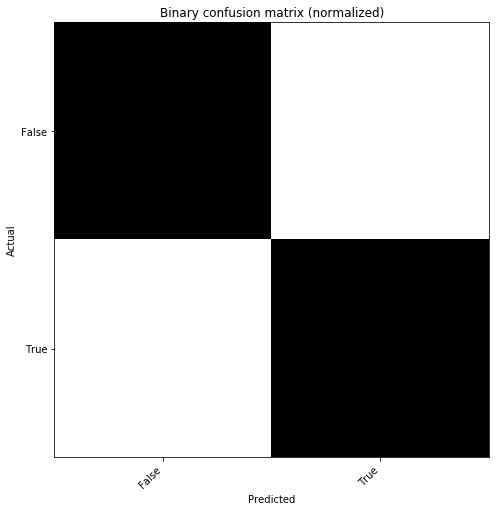

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [11]:
# Predic
y_pred = classifier.predict(X_test)  

#Analyse
confusion_matrix = ConfusionMatrix(y_test, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

print(classification_report(y_test, y_pred)) 